# 6.4 Machine Learning Part 1

This script contains the following:
1. Importing libraries and data
2. Data cleaning
3. Data prep for regression analysis
4. Regression analysis
Bonus: performance improvement after removing outliers

## 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path =r'/Users/jazmingutierrez/Sept2024LifeExpectancy'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_clean.csv'), index_col = False)

In [5]:
df.head()

,Unnamed: 0,Country Name,Country Code,Region,Income Group,Year,Life Expectancy,Prevalence of Undernourishment,CO2,Health Expenditure,Education Expenditure,Unemployment,Sanitation,Injuries,Communicable,NonCommunicable,Disease Type
0,0,Afghanistan,AFG,South Asia,Low income,2001,56.3080,47.8,730.0,9.861581,3.373310,10.809000,49.154430,2179727.10,9689193.70,5795426.38,Communicable
1,1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.0590,67.5,15960.0,4.483516,2.920000,4.004000,49.154430,1392080.71,11190210.53,2663516.34,Communicable
2,2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.2880,4.9,3230.0,7.139524,3.458700,18.575001,40.520895,117081.67,140894.78,532324.75,NonCommunicable
3,3,Andorra,AND,Europe & Central Asia,High income,2001,72.1685,6.2,520.0,5.865939,2.981845,5.920000,21.788660,1697.99,695.56,13636.64,NonCommunicable
4,4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.5440,2.8,97200.0,2.484370,3.867370,2.493000,82.723628,144678.14,65271.91,481740.70,NonCommunicable


In [7]:
df.shape

(3306, 17)

## 2. Data Cleaning

#### Extreme Values 

/Users/jazmingutierrez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Life Expectancy', ylabel='Count'>

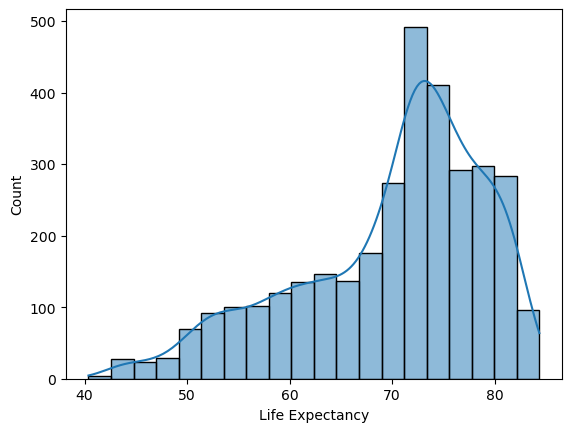

In [8]:
sns.histplot(df['Life Expectancy'], bins=20, kde = True) # shows extreme values for 'Life Expectancy'

In [9]:
df['Life Expectancy'].mean() # Check the mean

69.89355303734526

In [10]:
df['Life Expectancy'].median() # Check the median

72.1685

In [11]:
df['Life Expectancy'].max() # Check the max

84.3563414634146

## 3. Data Prep for Regression Analysis

### Hypothesis
- If sanitation levels are higher, then life expectancy increases.


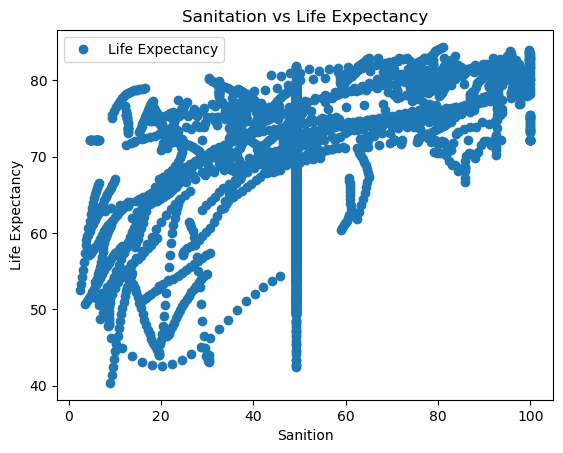

In [12]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Sanitation', y='Life Expectancy',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Sanitation vs Life Expectancy')  
plt.xlabel('Sanition')  
plt.ylabel('Life Expectancy')  
plt.show()

In [13]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Sanitation'].values.reshape(-1,1)
y = df['Life Expectancy'].values.reshape(-1,1)

In [14]:
X

array([[49.15443034],
       [49.15443034],
       [40.52089533],
       ...,
       [49.15443034],
       [49.15443034],
       [25.96354376]])

In [15]:
y

array([[56.308],
       [47.059],
       [74.288],
       ...,
       [64.131],
       [63.886],
       [61.49 ]])

In [16]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression Analysis

In [17]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [18]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [19]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

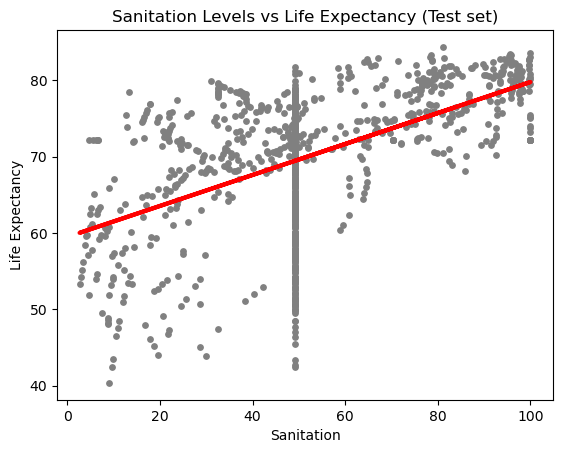

In [20]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Sanitation Levels vs Life Expectancy (Test set)')
plot_test.xlabel('Sanitation')
plot_test.ylabel('Life Expectancy')
plot_test.show()

In [21]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [22]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.20277957]]
Mean squared error:  57.78953955342976
R2 score:  0.2929618112371427


In [23]:
y_predicted

array([[69.45118308],
       [69.45118308],
       [78.61368114],
       [69.01068184],
       [75.0132351 ],
       [64.28849502],
       [69.45118308],
       [60.44903943],
       [69.45118308],
       [62.88723774],
       [79.3082487 ],
       [64.28030914],
       [67.14751466],
       [69.45118308],
       [77.92191274],
       [75.12857376],
       [74.79081038],
       [69.45118308],
       [79.76162561],
       [79.69372338],
       [79.76162561],
       [60.44561734],
       [69.45118308],
       [68.71354175],
       [69.45118308],
       [69.28599206],
       [63.94404184],
       [74.45793092],
       [76.0070978 ],
       [73.02793458],
       [69.48597006],
       [66.88399651],
       [77.92072958],
       [69.45118308],
       [69.45118308],
       [69.45118308],
       [79.24921554],
       [79.76162561],
       [74.07920232],
       [69.45118308],
       [78.90065975],
       [61.4374456 ],
       [69.45118308],
       [77.24580357],
       [63.4438505 ],
       [69

In [24]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,76.387000,69.451183
1,49.495000,69.451183
2,81.800000,78.613681
3,74.051000,69.010682
4,79.621000,75.013235
5,77.401000,64.288495
6,52.960000,69.451183
7,51.883000,60.449039
8,75.599000,69.451183
9,47.950000,62.887238


10. Slope is 0.20277957 it is a positive relationship between Sanitation levels and Life Expectancy.

11. The MSE is  57.78953955342976 it is relatively large in this case the model is not the best fit. R2 score 0.2929618112371427 29% of the variability in of Life Expectancy is explained by Sanitation levels , it is relatively low R2 idicating the model does not explain much of the variance of the data.

12. There is a difference between the actual and predicted y values, The model is not doing a great job of explaining the relationshp between the Sanitation levles and Life Expectancy variables. 

13. The hypothesis is only partially true. Sanitation variable alone does not impact life expectancy other variables collabertaing with sanitation can predict life expectancy. This can lead to biased estimates 